# Make pvalue plot

## Setup

In [30]:
import numpy as np
import cnvutils
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# The chromosome the event occurs on
CHROMOSOME = '5'
# The arm the event occurs on
ARM = 'p'
# Options: 'trans' or 'cis'
TRANS_OR_CIS = 'cis'

## Prepare the dataframe

In [22]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [23]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [24]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)

## Append Location Data

In [25]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [26]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()
results = results.sort_values(['start_bp', 'cancer'])

## Make the plots

AttributeError: 'FacetGrid' object has no attribute 'legend'

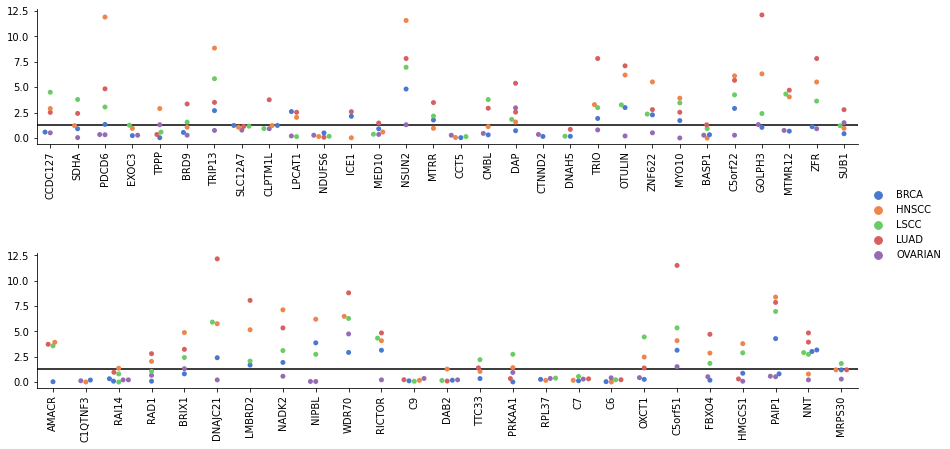

In [36]:
plot = cnvutils.make_pvalue_plot(results, label_column='index', value_column='value', group_column='cancer')
print(plot.legend)
# leg = plot.legend
# print(leg)
# print(ax)
# leg = ax.get_legend()
# print(leg)
# hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
# h1_dict['BRCA'].set_color('red')
# h1_dict['HNSCC'].set_color('blue')
# h1_dict['LUAD'].set_color('yellow')
# h1_dict['LSCC'].set_color('green')
# h1_dict['OVARIAN'].set_color('purple')